In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
ofname = open('../files/ch05/dataset_small.pkl', 'r')
# x stores input data and y target values
(x,y) = pickle.load(ofname)

In [7]:
dims = x.shape [1]
N = x.shape [0]
print('dims: ' + str(dims) + ', samples: ' + str(N))

dims: 15, samples: 4140


In [36]:
from sklearn import neighbors
from sklearn import datasets

# Create an instance of k-nearest neigbor classifier
knn = neighbors.KNeighborsClassifier(n_neighbors = 11)
# Train the classifier
knn.fit(x, y)
# Compute the prediction according to the model
yhat = knn.predict(x)
# Check the result on the last example
print('Predicted value: ' + str(yhat[-1]))
print('Real target: ' + str(y[-1]))

Predicted value: -1.0
Real target: -1.0


In [37]:
acc = knn.score(x,y)
print('Accuracy: ' + str(acc))

Accuracy: 0.8316425120772947


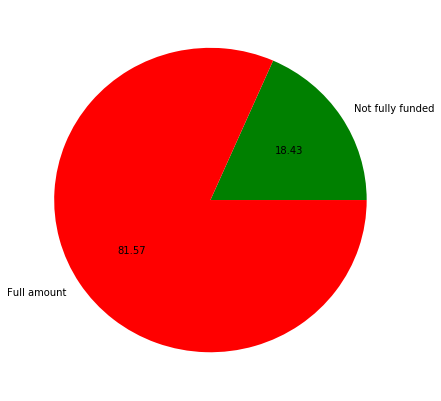

In [38]:
plt.pie(np.c_[np.sum(np.where(y == 1, 1, 0)),
             np.sum(np.where(y == -1, 1, 0))][0],
       labels = ['Not fully funded', 'Full amount'],
       colors = ['g', 'r'], shadow = False,
       autopct = '%.2f')
plt.gcf().set_size_inches((7, 7))

In [39]:
yhat = knn.predict(x)
TP = np.sum(np.logical_and(yhat == -1, y == -1))
TN = np.sum(np.logical_and(yhat == 1, y == 1))
FP = np.sum(np.logical_and(yhat == -1, y == 1))
FN = np.sum(np.logical_and(yhat == 1, y == -1))

print('TP: ' + str(TP), 'FP: ' + str(FP))
print('FN: ' + str(FN), 'TN: ' + str(TN))

('TP: 3370', 'FP: 690')
('FN: 7', 'TN: 73')


In [40]:
#Scikit-learn provides a method for the confusion matrix
from sklearn import metrics
metrics.confusion_matrix(yhat, y)

array([[3370,  690],
       [   7,   73]], dtype=int64)

In [41]:
# Train a classifier using .fit()
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(x, y)
yhat = knn.predict(x)

print('Classification accuracy: ' + str(metrics.accuracy_score(yhat, y)))
print('Confussion matrix: \n' + str(metrics.confusion_matrix(yhat, y)))

Classification accuracy: 1.0
Confussion matrix: 
[[3377    0]
 [   0  763]]


In [42]:
# Simulate a real case: Ransomize and split data into
# two subsets PRC*100\% for training and the rest
# (1-PRC)*100\% for testing

perm = np.random.permutation(y.size)
PRC = 0.7
split_point = int(np.ceil(y.shape[0]*PRC))

X_train = x[perm[:split_point].ravel(), :]
Y_train = y[perm[:split_point].ravel()]

X_test = x[perm[split_point:].ravel(), :]
Y_test = y[perm[split_point:].ravel()]

In [43]:
print('Training shape: ' + str(X_train.shape),
      'Training target shape: ' + str(Y_train.shape))
print('Testing shape: ' + str(X_test.shape),
      'Testing target shape: ' + str(Y_test.shape))

('Training shape: (2898L, 15L)', 'Training target shape: (2898L,)')
('Testing shape: (1242L, 15L)', 'Testing target shape: (1242L,)')


In [45]:
# Train a classifier on training data
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)
yhat = knn.predict(X_train)

print('TRAININ STATS:')
print('Classification accuracy: ' + str(metrics.accuracy_score(yhat, Y_train)))
print('Confusion matrix: \n' + str(metrics.confusion_matrix(Y_train, yhat)))

TRAININ STATS:
Classification accuracy: 1.0
Confusion matrix: 
[[2350    0]
 [   0  548]]


In [46]:
# Check on the test set
yhat = knn.predict(X_test)
print('TESTING STATS')
print('classification accuracy: ', metrics.accuracy_score(yhat, Y_test))
print('confusion matrix: \n' + str(metrics.confusion_matrix(yhat, Y_test)))

TESTING STATS
('classification accuracy: ', 0.7536231884057971)
confusion matrix: 
[[864 143]
 [163  72]]


In [57]:
# Splitting done by using the tools provided by sklearn
from sklearn.model_selection import train_test_split

PRC = 0.3
acc = np.zeros((10,))

for i in xrange(10):
    X_train, X_test, Y_train ,Y_test = train_test_split(x, y, test_size = PRC)
    knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train, Y_train)
    yhat = knn.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat, Y_test)

acc.shape = (1, 10)
print('Mean expected error: ' + str(np.mean(acc[0])))

Mean expected error: 0.760144927536232


In [67]:
from sklearn import tree
from sklearn import svm

PRC = 0.1
acc_r = np.zeros((10, 4))
for i in xrange(10): 
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = PRC)
    nn1 = neighbors.KNeighborsClassifier(n_neighbors = 1)
    nn3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
    svc = svm.SVC(gamma = 'auto')
    dt = tree.DecisionTreeClassifier()
    
    nn1.fit(X_train, Y_train)
    nn3.fit(X_train, Y_train)
    svc.fit(X_train, Y_train)
    dt.fit(X_train, Y_train)
    
    yhat_nn1 = nn1.predict(X_test)
    yhat_nn3 = nn3.predict(X_test)
    yhat_svc = svc.predict(X_test)
    yhat_dt = dt.predict(X_test)
    
    acc_r[i][0] = metrics.accuracy_score(yhat_nn1, Y_test)
    acc_r[i][1] = metrics.accuracy_score(yhat_nn3, Y_test)
    acc_r[i][2] = metrics.accuracy_score(yhat_svc, Y_test)
    acc_r[i][3] = metrics.accuracy_score(yhat_dt, Y_test)

# EN EL LIBRO HAY UN GRAFICO QUE NO MUESTRAN EL CODIGO
# PODRIA TRATAR DE HACERLO
# PAGINA 77